# OFacT - Beispielhafter Workflow
Modellparameter bestimmen, simulieren und analysieren ...

![Architecture](imgs/architecture.png)

## Parametrierbares Modell mit Parametern

### 🏭 Modell
Das Modell beschreibt das reale Produktions- oder Logistiksystem.

### Parameter: 📥 Auftragspool (System Last)
Die Aufträge bilden die Last für das System ab. Dies kann bspw. der Order Pool eines Tages sein.

###  Parameter: 📅 Schichtplan (Kapazitäten)
Der Schedule ist der Schichtplan des System. Es beschreibt welche Ressourcen (Mitarbeiter, Arbeitsstationen, etc.) wann verfügbar sind.

## 🏭 Simulieren
Für die Simulation wird das parametrierbare Modell eingeladen und nachfolgend simuliert (Simulationslauf).
Welcher Zeitraum simuliert wird oder ob die simuliert den vollstänfigen Auftragspool durchsimuliert ist bspw. ein weiterer Parameter.

## 📊 Analysieren
Basierend auf den simulierten Prozessausführungen, wird im nachfolgenden der Simulationslauf ausgewertet.
Die Auswertung lassen sich unterschiedliche Kennzahlen heranziehen ...
- Liefertreue
- Ressourcenauslastung
- Durchlaufzeit
- ...

Basierend auf den Ergebnissen, lassen sich die Modellparameter manuell oder automatisiert editieren.
Zielsetzung ist die Verbesserung der Ergebnisse, nach vorher definierten Zielgrößen.
Beispielhaft soll die Ressourcenauslastung und die Liefertreue optimiert werden. Beiede sollen möglichst 100% erreichen ...
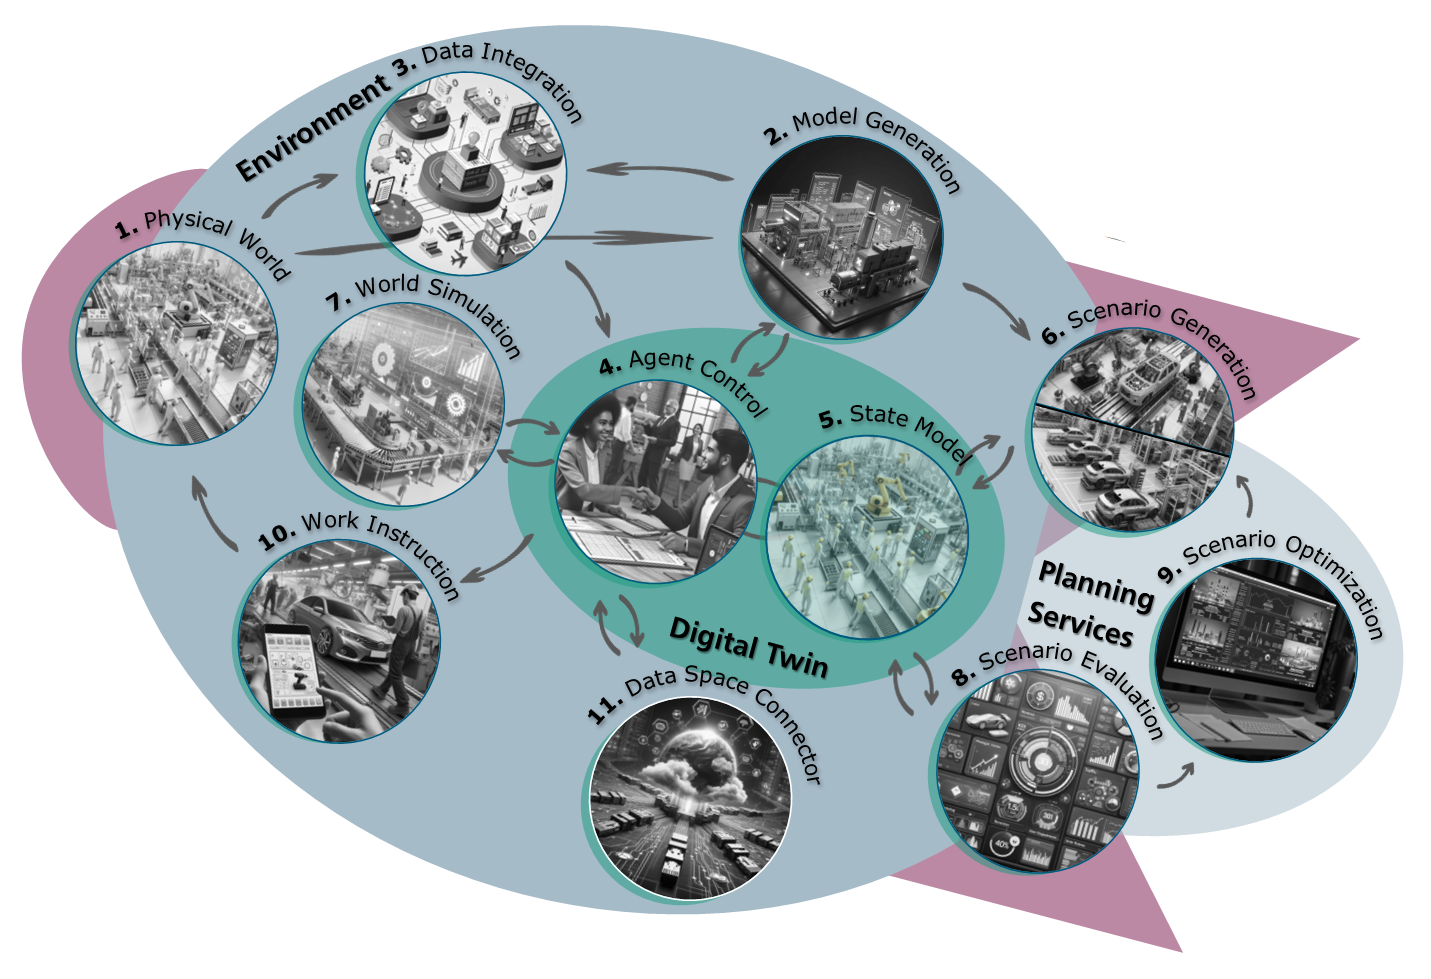

# Modell

In [1]:
from projects.data_detectives.code.functions import *
from pathlib import Path

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world


In [2]:
state_model_file_name = "bicycle_factory"
file_types = ["xlsx",  # Menschen lesbar modelliert in Excel
              "pkl"]   # Maschinen lesbar und damit schneller
file_type = file_types[0]
state_model = create_state_model(state_model_file_name,
                                 file_type=file_type)

[2025-08-29 15:10:39.801791] Start deserialization from excel file C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world\scenarios\current\models\twin\bicycle_factory.xlsx
[2025-08-29 15:11:07.989164] Static state model deserialization from excel file C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world\scenarios\current\models\twin\bicycle_factory.xlsx finished.
2025-08-29 15:11:52.928093 State Model Serialization finished.


Das State Model ist nun eingeladen und kann verwendet werden.

Um einen Eindruck zu bekommen, was sich hinter State Model verbirgt, können wir die Orders (Aufträge) abrufen.

In [ ]:
orders = state_model.get_orders()
for order in orders:
    print(f"Der Kundenname des Auftrags ist: '{order.customer.name}'.")

In [ ]:
order = orders[0]

print("Der erste Auftrag hat die folgenden Merkmale:")
for i, feature in enumerate(order.features_requested):
    print(f"Merkmal {i}: '{feature.name}'")

# Parameter

Jetzt gilt es das State Model zu parametrieren, wodurch unterschiedliche Szenarien entstehen.
Schauen wir uns beispielhaft den Schedule (Personaleinsatzplan) an.

In [3]:
schedule_name = "schedule_s1"
get_table(f"/scenarios/current/models/resource/{schedule_name}.xlsx", target_file=None, sheet_name="General")

# Simulation

***Beachte***: Bevor die Simulation gestartet werden kann, sollte der Kommunikationserver für die Agenten der Simulationumgebung gestartet werden.
Dies einfach im Terminal mit dem Befehl "pyjabber" einmalig zu erledigen.

In [6]:
start_time_simulation = datetime(2025, 9, 2, 7)
resource_schedule = "schedule_s1"
work_in_process = 5  # to vary
update_simulation_input_parameters(start_time_simulation=start_time_simulation,
                                   work_in_process=work_in_process)

In [7]:
!python -m projects.bicycle_world.scenarios.current.main

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world
STATUS: Starting Execution
Platform name: Windows
2025-08-29 15:14:14.329377 Execute Simulation
Digital Twin updated
Environment Initialized
correction_needed available
agents from excel
Agents model created
Agents Model Initialized
2025-08-29 15:14:15.968804 Register Agents
Individualize Agents
Time limit: (datetime.datetime(2025, 9, 2, 7, 0), datetime.datetime(2025, 9, 2, 17, 0), 19)
...[agent administration] removing all existing users from the xmpp-server (http://127.0.0.1:9090)
...[agent administration] Create Agents
[Agent Administration] Start agent main_part_agv_nsr_agentfactory_agents 

[main_part_agv_nsr_agentfactory_agents] Hello World! I'm agent main_part_agv_nsr_agentfactory_agents@127.0.0.1 
 TransportAgent 

[Agent Administration] Start agent individual_part_agv_nsr_agentfactory_agents 

[individual_part_agv_nsr_agentfactory_agents] Hello World! I'm agent individual_par

C:\Users\afreiter\PycharmProjects\ofact\ofact\twin\change_handler\Observer.py:135: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.utilisation_df = pd.concat([


# Analyse

Mit dem simulierten State Model können wir nun verschiedene Kennzahlen berechnen und unterschiedliche Szenarien analysieren.

In [12]:
scenario = f"{resource_schedule}_{int(work_in_process)}"

state_model_file_path = Path(PROJECT_PATH + f"/scenarios/current/results/{scenario}.pkl")
state_model: StateModel = deserialize_state_model(state_model_file_path, persistence_format="pkl", dynamics=True)

Platform name: Windows
Problem: id.27233


AnalyticsDataBase instantiation finished


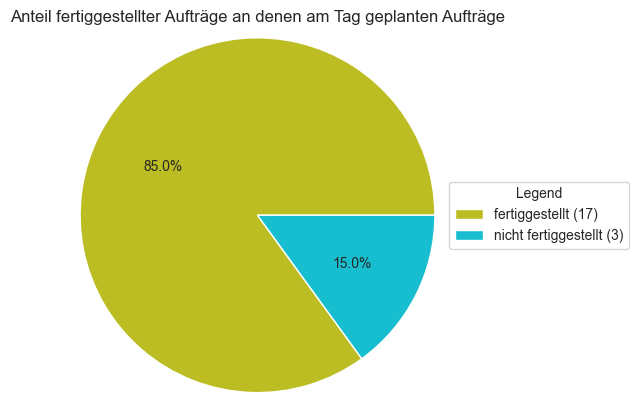

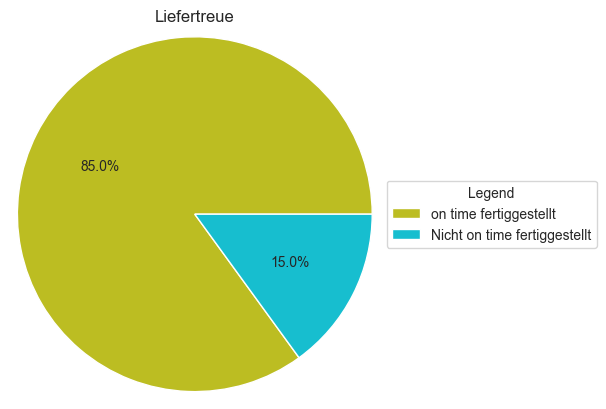

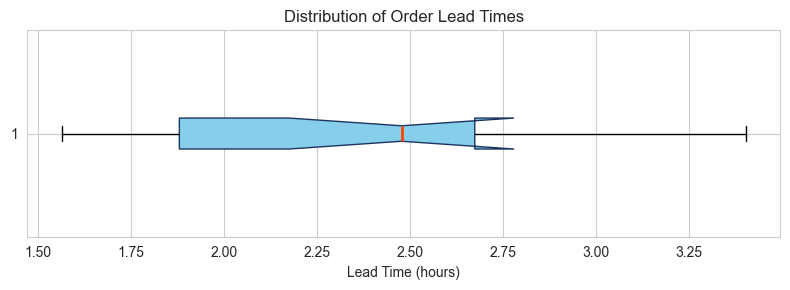

In [13]:
schedule = get_schedule(state_model)

get_order_finished(state_model)  # share of orders finished
get_delivery_reliability(state_model)  # delivery reliability
get_order_lead_time(state_model)  # order lead time
actual_resources_working_hours, planned_resources_working_hours = (
    get_schedule_time_equivalent(schedule=schedule,
                                 aggregated=["Main Part AGV"]))  # capacity utilization